# Machine Learning MLS Week-3

### Problem Statement

#### We will be trying to understand sentiment of tweets about the company Apple. By using the twitter data we can hope to understand the public perception a bit better.

#### Our challenge is to see if we can correctly classify tweets as being either positive or negative.

#### Problem Statement:
#### •	Correctly classify the tweets as being positive or negative.

In [17]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [18]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.1
Matplotlib version: 3.3.4


#### Load the csv file available in the working or specified directory

In [86]:
Apple_tweets = pd.read_csv("Apple_tweets.csv")

In [20]:
## Checking the first 5 rows of the dataset

Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


## Using Naive Bayes Classifier

In [87]:
# Find the total number of tweets in the data
len(Apple_tweets)

1181

### Basic Exploration in Text Mining

#### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [89]:
## Let's get a word count without writing a lambda function

Apple_tweets['Totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()]
Apple_tweets[['Tweet','Totalwords']].head()

,Tweet,Totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [90]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Count of Characters- including spaces

In [91]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


In [92]:
Apple_tweets['Tweet'][0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [93]:
len(Apple_tweets['Tweet'][0])

101

### Average Length of the Word


In [94]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average length of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Count of StopWords

In [95]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Count of special character

In [96]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


In [174]:
Apple_tweets['at_the_rate'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
Apple_tweets[['Tweet','at_the_rate']].head()

,Tweet,at_the_rate
0,say far best customer care service ever receiv...,0
1,ios 7 fricking smooth beautiful thanxapple,0
2,love u,0
3,thank loving new iphone 5s iphone5s pictwitter...,0
4,best customer service new phone 10min,0


### Count of Numbers

In [97]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Count of Uppercase Words

In [101]:
Apple_tweets['UpperCase'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','UpperCase']].head()

,Tweet,UpperCase
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Count of Uppercase Letters

In [102]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


## Basic Pre-Processing

### Lower Case conversion

In [104]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [106]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

<ipython-input-106-36a1c2647d3b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')


0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

### Removal of StopWords

In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [109]:
all_words=[i for i in ' '.join(Apple_tweets['Tweet']).split()]

In [110]:
words=pd.DataFrame(data=all_words, columns=['words'])


In [112]:
words.value_counts().head(10)

words          
apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
ipodplayerpromo      60
get                  60
dtype: int64

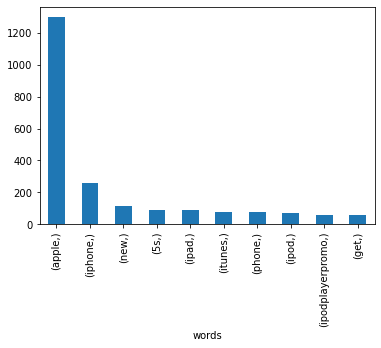

In [116]:
words.value_counts().head(10).plot.bar()
plt.show()

In [117]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [118]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [119]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

haa            1
environment    1
betas          1
mainstream     1
geekchic       1
peasants       1
earphones      1
proves         1
tacky          1
utility        1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [121]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       say far best custom care servic ever receiv ap...
1                      io 7 frick smooth beauti thanxappl
2                                                  love u
3       thank love new iphon 5s iphone5 pictwittercomx...
4                      best custom servic new phone 10min
                              ...                        
1176                                                freak
1177      cant freak see pictur tl im annoy freak twitter
1178                                      freak cow freak
1179                          hate phone work im go freak
1180                     agounalaki that nasti nasti brat
Name: Tweet, Length: 1181, dtype: object

In [123]:
#Classify the tweet into Postive and Negative
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [124]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,Totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,Upper,UpperCase,upper_letter,Sentiment
0,say far best customer care service ever receiv...,2.0,19,19,101,4.368421,6,0,0,2,2,2,6,Positive
1,ios 7 fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,2,1,1,0,0,0,5,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,3,3,3,10,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,11,12,91,7.272727,2,2,3,1,1,1,9,Positive
4,best customer service new phone 10min,1.8,16,16,82,4.187500,8,0,2,0,0,0,1,Positive


In [125]:
Apple_tweets['Sentiment'].value_counts()

Positive    640
Negative    541
Name: Sentiment, dtype: int64

## Let's look at distribution of different sentiments

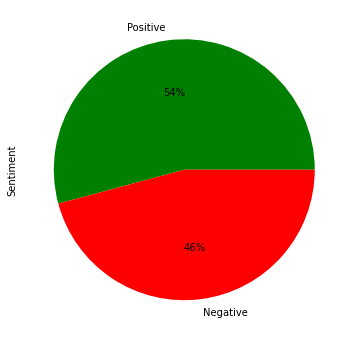

In [126]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [127]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   Totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  Upper         1181 non-null   int64  
 11  UpperCase     1181 non-null   int64  
 12  upper_letter  1181 non-null   int64  
 13  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(10), object(2)
memory usage: 129.3+ KB


In [140]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets['Sentiment'].values

In [141]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [142]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [144]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [145]:
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head()

,5c,5s,7evenstarz,actually,already,always,amazing,amazon,android,anyone,...,wow,wtf,ya,yall,year,yes,yet,yo,yooo,youre
742,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test split

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [147]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

# Gaussian Naive Bayes

In [148]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [149]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [150]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7699757869249395
[[198 168]
 [ 22 438]]
              precision    recall  f1-score   support

    Negative       0.90      0.54      0.68       366
    Positive       0.72      0.95      0.82       460

    accuracy                           0.77       826
   macro avg       0.81      0.75      0.75       826
weighted avg       0.80      0.77      0.76       826



In [151]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6704225352112676
[[ 92  83]
 [ 34 146]]
              precision    recall  f1-score   support

    Negative       0.73      0.53      0.61       175
    Positive       0.64      0.81      0.71       180

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.66       355
weighted avg       0.68      0.67      0.66       355



#### Since the sentiment is balanced we will consider Accuracy as model evaluation metric to measure the performance of the model.
#### Whenever the accuracy metric is used, we aim to learn the closeness of a measured value to a known value.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [152]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear love new default alarm ringtone goodmorning
Name: Tweet, dtype: object

In [153]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [154]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say far best customer care service ever receiv...
1              ios 7 fricking smooth beautiful thanxapple
2                                                  love u
3       thank loving new iphone 5s iphone5s pictwitter...
4                   best customer service new phone 10min
                              ...                        
1176                                                freak
1177    cant freaking see pictures tl annoyed freak tw...
1178                                  freaking cows freak
1179                       hate phone working going freak
1180                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 1181, dtype: object

In [155]:
wc_a = ' '.join(corpus)

Word Cloud for Apple_Tweets (after cleaning)!!


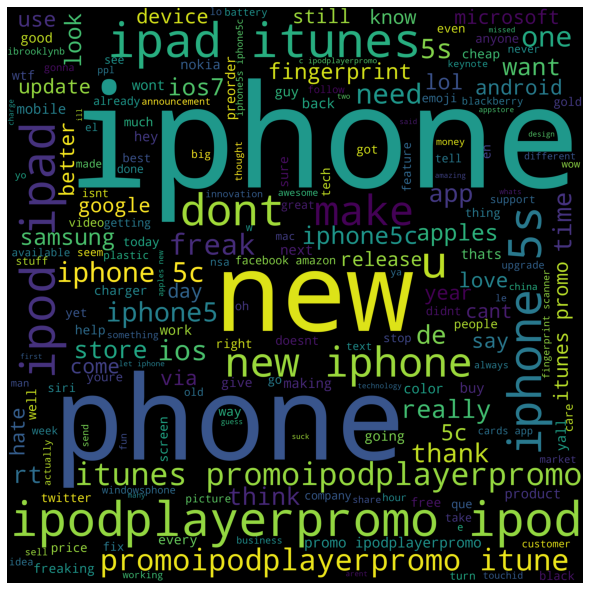

In [156]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

As the data was collected at the begining of the new iphone launch, it is already indicated by words 'new' and 'iphone' or 'phone'. We can add these words to stop words list and rebuid the word cloud to find some interesting insights

## Creating a WordCloud on Postive Tweets 

In [169]:
Apple_tweets_Postive=Apple_tweets[Apple_tweets['Sentiment']=='Positive']

In [163]:
# Extending the list of stop words based on the wordcloud found above (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["iphone","phone","iphone 5s"])

In [164]:
#Removing stop words (extended list as above) from the corpus 

corpus_postive = Apple_tweets_Postive['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_postive

0      say far best customer care service ever receiv...
1             ios 7 fricking smooth beautiful thanxapple
2                                                 love u
3      thank loving new 5s iphone5s pictwittercomxmhj...
4                        best customer service new 10min
                             ...                        
635                                                     
636    c ipodplayerpromo ipod ipad itunes promoipodpl...
637    apples new iphone5c case reminds crocs sorry y...
638            going create upgrade unsend text messages
639    iphone5c e iphone5s prezzi germania httpshares...
Name: Tweet, Length: 640, dtype: object

In [165]:
wc_p = ' '.join(corpus_postive)

Word Cloud for Positive Apple_Tweets (after cleaning)!!


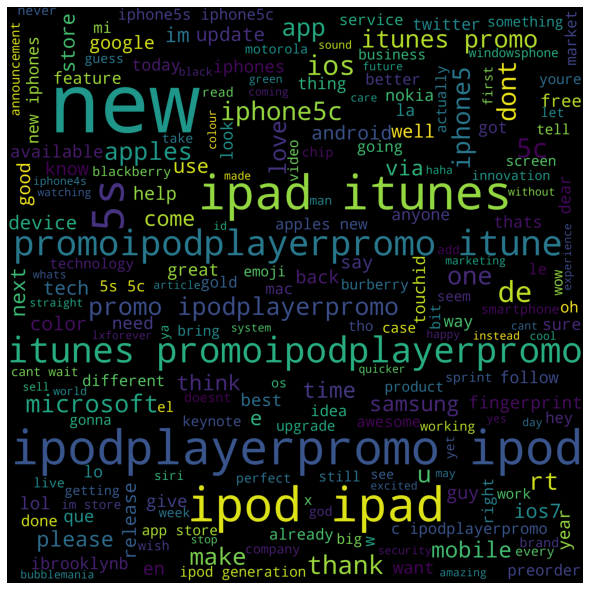

In [166]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_p) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Positive Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

## Creating a WordCloud on Negative Tweets

In [168]:
Apple_tweets_Negative=Apple_tweets[Apple_tweets['Sentiment']=='Negative']

In [170]:
#Removing stop words (extended list as above) from the corpus 

corpus_negative = Apple_tweets_Negative['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_negative

640     important become developer world need people i...
641     google chrome test test test ipad retina chrom...
642                                   fulltimebro hip 110
643     microsoft getting desperate willing pay 200 tr...
644      google laughing laughing left love chrome stinks
                              ...                        
1176                                                freak
1177    cant freaking see pictures tl im annoyed freak...
1178                                  freaking cows freak
1179                          hate working im going freak
1180                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 541, dtype: object

In [171]:
wc_n = ' '.join(corpus_negative)

Word Cloud for Negative Apple_Tweets (after cleaning)!!


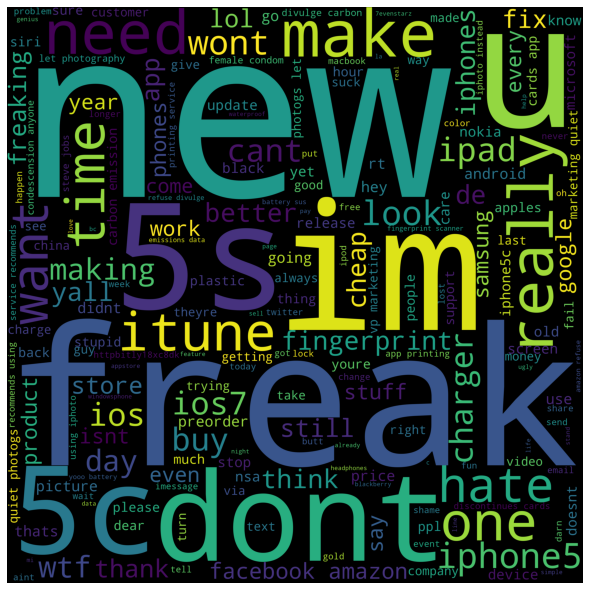

In [173]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_n) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Negative Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

# END